In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Matplotlib is building the font cache; this may take a moment.


In [2]:
readData = pd.read_csv ('marks.csv')
readData

,Month,Marks
0,1,50
1,2,49
2,3,53
3,4,67
4,5,67
5,6,69
6,7,71
7,8,88
8,9,89
9,10,90


In [3]:
readData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Month   10 non-null     int64
 1   Marks   10 non-null     int64
dtypes: int64(2)
memory usage: 288.0 bytes


In [7]:
y = readData ['Marks']
x = readData ['Month']

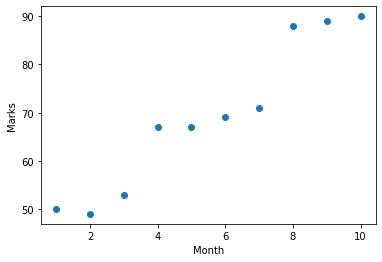

In [8]:
plt.scatter (x,y)
plt.xlabel('Month')
plt.ylabel('Marks')
plt.show()

In [9]:
X = readData.iloc[:,0:1].values
y = readData.iloc[:,1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
X_train

array([[ 5],
       [10],
       [ 2],
       [ 7],
       [ 8],
       [ 4],
       [ 1],
       [ 6]], dtype=int64)

In [11]:
X_test

array([[3],
       [9]], dtype=int64)

In [12]:
y_train

array([67, 90, 49, 71, 88, 67, 50, 69], dtype=int64)

In [13]:
y_test

array([53, 89], dtype=int64)

In [14]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)
print('y_train', y_train.shape)
print('y_test', y_test.shape)

X_train (8, 1)
X_test (2, 1)
y_train (8,)
y_test (2,)


In [15]:
import statsmodels.api as sm
x1 = sm.add_constant(X_train)
model1 = sm.OLS(y_train, x1).fit()

In [16]:
model1.summary()

C:\Users\Rushd\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.908
Method:                 Least Squares   F-statistic:                     69.91
Date:                Wed, 29 Dec 2021   Prob (F-statistic):           0.000159
Time:                        11:21:55   Log-Likelihood:                -22.330
No. Observations:                   8   AIC:                             48.66
Df Residuals:                       6   BIC:                             48.82
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.2622      3.461     12.501      0.000      34.794      51.730
x1             4.7652      0.570      8.361      0.000       3.371       6.160
==============================================================================
Omnibus:                        0.547   Durbin-Watson:                   1.577
Prob(Omnibus):                  0.761   Jarque-Bera (JB):                0.517
Skew:                           0.293   Prob(JB):                        0.772
Kurtosis:                       1.900   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
from sklearn.linear_model import LinearRegression
linearReg = LinearRegression()
linearReg.fit(X, y)

LinearRegression()

In [18]:
linearReg.score(X_test, y_test) #check accuracy 

0.971517078756136

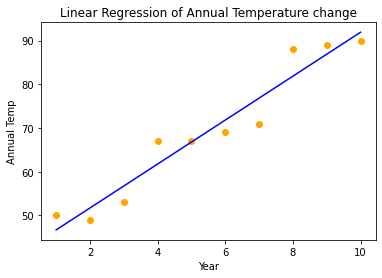

In [19]:
def getLinearOutput():
    plt.scatter(X, y, color='Orange')
    plt.plot(X, linearReg.predict(X), color='Blue')
    plt.title('Linear Regression of Annual Temperature change')
    plt.xlabel('Year')
    plt.ylabel('Annual Temp')
    plt.show()
    return
getLinearOutput() 

In [20]:
linearReg.predict([[5.5]])

array([69.3])

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=4)
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)

LinearRegression()

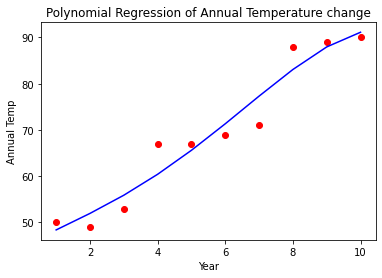

In [22]:
def getpolymonial():
    plt.scatter(X, y, color='Red')
    plt.plot(X, pol_reg.predict(poly_reg.fit_transform(X)), color='Blue')
    plt.title('Polynomial Regression of Annual Temperature change')
    plt.xlabel('Year')
    plt.ylabel('Annual Temp')
    plt.show()
    return

getpolymonial()

In [23]:
pol_reg.predict(poly_reg.fit_transform([[5.5]]))

array([68.41015625])

In [34]:
predicted = {}
for i in range(1,10):
    yhat = 43.26 + 4.7652 * (6 + i)
    predicted[10 + i] = yhat

In [35]:
predicted

{11: 76.6164,
 12: 81.38159999999999,
 13: 86.1468,
 14: 90.912,
 15: 95.6772,
 16: 100.44239999999999,
 17: 105.2076,
 18: 109.9728,
 19: 114.738}